## Multiple Linear Regression: (MLR)

**Multiple linear regression has five main assumptions that provide validity to the results derived from the analysis**
1.	Linearity: Each predictor variable (Xi) is linearly related to the outcome variable (Y).(Already proved in previous steps)
2.	(Multivariate) normality: The errors are normally distributed.*
3.	Independent observations: Each observation in the dataset is independent.
4.	Homoscedasticity: The variation of the errors is constant or similar across the model.*
5.	No multicollinearity: No two independent variables (Xi and Xj) can be highly correlated with each other.


In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np
import math
# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
import statsmodels.api as sm            #### qqplot Normality model assumption
from statsmodels.formula.api import ols ### model creation package
from statsmodels.stats.outliers_influence import variance_inflation_factor #### Multicollinearity VIF factor 
from statsmodels.stats.multicomp import pairwise_tukeyhsd   ##### create post hoc test
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics # For confusion matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
df=pd.read_csv(r"C:\Users\yorgh\Documents\Course Materials\Google Advanced Data Analytics Course\Datasets Exercise\Automatidata project\2017_Yellow_Taxi_Trip_Features_engineering(2).csv")

In [3]:
df

,trip_distance,duration,total_amount,rush_hour
0,3.34,14.066667,13.8,0
1,1.80,26.500000,16.8,0
2,1.00,7.200000,7.3,1
3,3.70,30.250000,21.3,0
4,4.37,16.716667,17.8,0
...,...,...,...,...
21917,0.89,9.450000,8.8,0
21918,0.61,3.266667,5.8,1
21919,0.42,4.133333,5.3,0
21920,2.36,11.933333,11.3,0


**Correlation Matrix**

In [4]:
# Create correlation matrix containing pairwise correlation of columns, using pearson correlation coefficient
df.corr(method='pearson')

,trip_distance,duration,total_amount,rush_hour
trip_distance,1.000000,0.744743,0.949821,-0.055960
duration,0.744743,1.000000,0.887939,0.016588
total_amount,0.949821,0.887939,1.000000,-0.008330
rush_hour,-0.055960,0.016588,-0.008330,1.000000


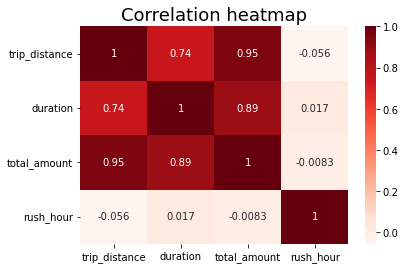

In [5]:
# Create correlation heatmap

plt.figure(figsize=(6,4))
sns.heatmap(df.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation heatmap',
          fontsize=18)
plt.show()

**Exemplar response:** `duration` and `trip_distance` are both highly correlated with the target variable of `total_amount` They're also both correlated with each other, with a Pearson correlation of 0.74.

Recall that highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

This model will predict `total_amount`, which will be used as a predictor variable in machine learning models. Therefore, try modeling with both variables even though they are correlated.

In [6]:
# Remove the target column from the features
X = df.drop(columns=['total_amount'])

# Set y variable
y = df[['total_amount']]

# Display first few rows
X.head()

,trip_distance,duration,rush_hour
0,3.34,14.066667,0
1,1.80,26.500000,0
2,1.00,7.200000,1
3,3.70,30.250000,0
4,4.37,16.716667,0


**`Variance Inflation Factors (VIF)`**

In [7]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

[4.1652891443585585, 4.6811228266852085, 1.2930118228806489]

Calculating the variance inflation factor, or VIF, for each independent (X) variable is a way to quantify how much the variance of each variable is “inflated” due to correlation with other X variables. 

The smallest value a VIF can take on is 1, which would indicate 0 correlation between the X variable in question and the other predictor variables in the model. A high VIF, such as 5 and above, according to the statsmodels documentation, can indicate the presence of multicollinearity

**Split the data into train/test split**

In [8]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Standarization**

In [9]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.469971   -0.41134202 -0.65073635]
 [-0.48825265 -0.94127929 -0.65073635]
 [-0.48825265 -0.40398178  1.53672068]
 ...
 [ 0.06385305  0.51052804  1.53672068]
 [-0.48825265 -0.66159018 -0.65073635]
 [-0.63450581  1.75808871  1.53672068]]


In [10]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

**Evaluation metrics for Multiple linear regression**

In [11]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.9737214203495708
R^2: 0.9737214203495708
MAE: 0.5882997654513837
MSE: 1.795751509313709
RMSE: 1.3400565321335176


1) `R²: The coefficient of determination`

R² measures the proportion of variation in the dependent variable, Y, explained by the independent variable(s), X.

•	This is calculated by subtracting the sum of squared residuals divided by the total sum of squares from 1.
R²=1−Sum of Total sum of squared residuals
R² ranges from 0 to 1. So, if a model has an R² of 0.85, that means that the X variables explain about 85% of the variation in the Y variable. Although R² is a highly interpretable and commonly used metric, you may also encounter mean squared error (MSE) and mean absolute error (MAE) when R² is insufficient in evaluating model performance.

2) `MSE: Mean squared error`

MSE (mean squared error) is the average of the squared difference between the predicted and actual values.
•	Because of how MSE is calculated, MSE is very sensitive to large errors.

3) `MAE: Mean absolute error`

MAE (mean absolute error) is the average of the absolute difference between the predicted and actual values.
•	If your data has outliers that you want to ignore, you can use MAE, as it is not sensitive to large errors.

4) `Adjusted R²`

The adjusted R-squared penalizes the addition of more independent variables to the multiple regression model. Additionally, the adjusted R-squared only captures the proportion of variation explained by the independent variables that show a significant relationship with the outcome variable. 

5) `RMSE: Root Mean squared error`

RMSE is simply the square root of the MSE. It is particularly useful because it's in the same units as the target variable, making it easier to interpret.

In [12]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [13]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.9834805900559194
R^2: 0.9834805900559194
MAE: 0.5637309499858665
MSE: 1.2326200453366565
RMSE: 1.1102342299427885


In [14]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['total_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
21265,5.8,6.161323,-0.361323
13086,16.3,16.334842,-0.034842
12422,20.8,21.586118,-0.786118
16447,17.8,18.205179,-0.405179
2901,5.8,5.433066,0.366934


**Normality assumption**

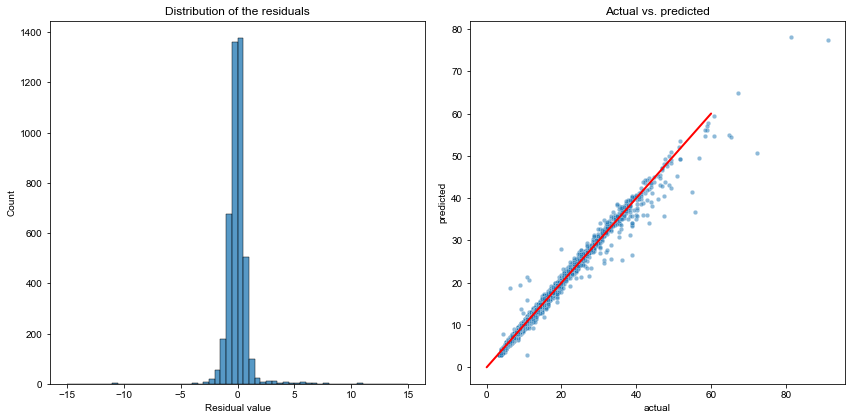

In [15]:
# Create the first plot (histogram)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.histplot(results['residual'], bins=np.arange(-15, 15.5, 0.5))
plt.title('Distribution of the residuals')
plt.xlabel('Residual value')
plt.ylabel('Count')

# Create the second plot (scatter plot)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5
)
# Draw an x=y line to show what the results would be if the model were perfect
plt.plot([0, 60], [0, 60], c='red', linewidth=2)
plt.title('Actual vs. predicted')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

**Normality: The errors are normally distributed.**

**Homoscedasticity Assumption**

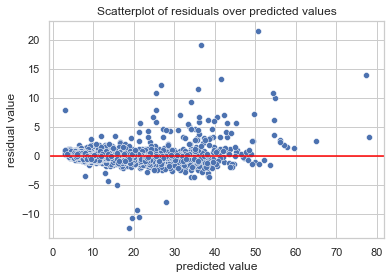

In [17]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

**Normality: The errors are normally distributed.**

**Homoscedasticity: The variation of the errors is constant or similar across the model.**

In [18]:
# Get model coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,trip_distance,duration,rush_hour
0,5.356858,3.352368,0.178915


In [21]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['trip_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print(5.356858 / X_train['trip_distance'].std())

2.735061519290655
1.958587754687622


Now you can make a more intuitive interpretation: for every 2.735 miles traveled, the fare increased by a mean of \\$5.35. Or, reduced: for every 1 mile traveled, the fare increased by a mean of \\$1.958.